In [164]:
import numpy as np
import astropy
from astropy.io import ascii
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
from astropy.table import Table, Column
import pylab
from pylab import plot
from astropy.cosmology import WMAP9 as cosmo
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline
%config InlineBackend.figure_format='svg'
%config InlineBackend.figure_format='retina'

In [165]:
print("\033[43;30mLendo os catalogos\033[m")
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data
k = Table.read('koester2007.vot', format='votable')
print 'Wen:',len(w)
print 'Rykoff:',len(r)
print 'Koester:', len(k) 

Lendo os catalogos
Wen: 132684
Rykoff: 26111
Koester: 13823


In [166]:
print("\033[43;30mValores de Ra, Dec e z de cada catalogo\033[m")
c_w = SkyCoord(ra = w['RAJ2000']*u.degree, dec = w['DEJ2000']*u.deg, distance = cosmo.comoving_distance(w['zph'])) 
c_r = SkyCoord(ra = r['RA']*u.deg, dec = r['DEC']*u.deg, distance = cosmo.comoving_distance(r['Z_LAMBDA']))
c_k = SkyCoord(ra = k['RAJ2000'], dec = k['DEJ2000'], distance = cosmo.comoving_distance(k['zph'])) 

Valores de Ra, Dec e z de cada catalogo


# Match do Wen com o Rykoff

In [167]:
print 'match to catalog 3d'
idwr, d2dw, d3dw = c_w.match_to_catalog_3d(c_r) 
print 'Match Wen em relacao ao Redmapper =',len(idwr)
print idwr, d2dw, d3dw 

print 'match to catalog 3d'
idrw, d2dr, d3dr = c_r.match_to_catalog_3d(c_w) 
print 'Match Wen em relacao ao Redmapper =',len(idrw)
print idrw, d2dr, d3dr

match to catalog 3d
Match Wen em relacao ao Redmapper = 132684
[ 1803  9032 18830 ...,  2468 26004  8176] [u'4d43m43.8962s' u'0d00m00.0182s' u'1d59m21.6947s' ..., u'6d22m59.7905s'
 u'1d16m28.0575s' u'0d20m13.0253s'] [ 45.53540049   6.9589648   71.61914322 ...,  51.57056377  46.46153162
  13.90166084] Mpc
match to catalog 3d
Match Wen em relacao ao Redmapper = 26111
[101460 107605  76974 ...,  65527  48891  38446] [u'1d16m06.0083s' u'0d00m00.0063s' u'0d00m00.0168s' ..., u'0d23m14.6394s'
 u'1d17m58.6335s' u'0d13m31.7554s'] [ 15.65166566  10.31144     13.10023657 ...,  11.55481329  51.6395054
   7.38320118] Mpc


In [168]:
#plt.hist(d2dw, bins=10000)
#plt.xlabel('d2d')
#plt.xlim(0,0.008)
#plt.ylim(0,10)

(0, 10)

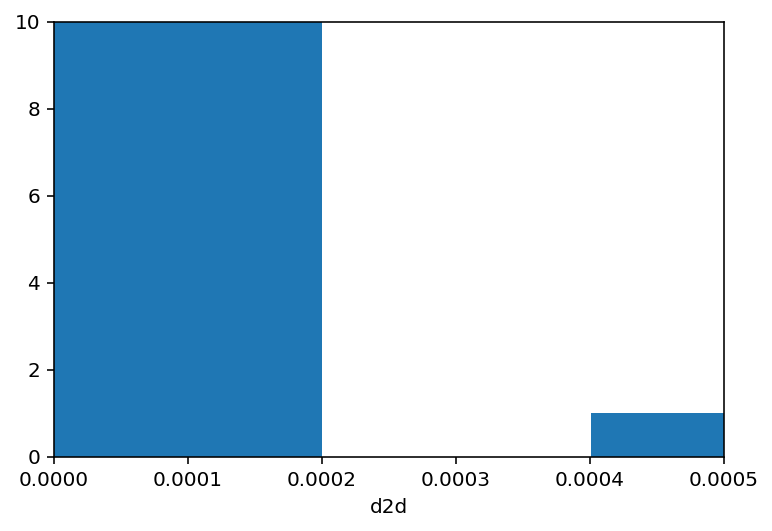

In [169]:
plt.hist(d2dr, bins=30000)
plt.xlabel('d2d')
plt.xlim(0,0.0005)
plt.ylim(0,10)

In [170]:
print len(np.unique(idwr))
print len(np.unique(idrw))
print len(idrw[d2dr<0.0003*u.deg])
print len(idwr[d2dw<0.0003*u.deg])

24430
22256
5276
7812


In [171]:
print 'Objects around to catalog 3d'
idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, 1000*u.kpc)
print 'Números de objetos do wen =',len(idxc_w)
print 'Números de objetos do rykoff =',len(idxc_r)

Objects around to catalog 3d
Números de objetos do wen = 290
Números de objetos do rykoff = 290


(0, 10)

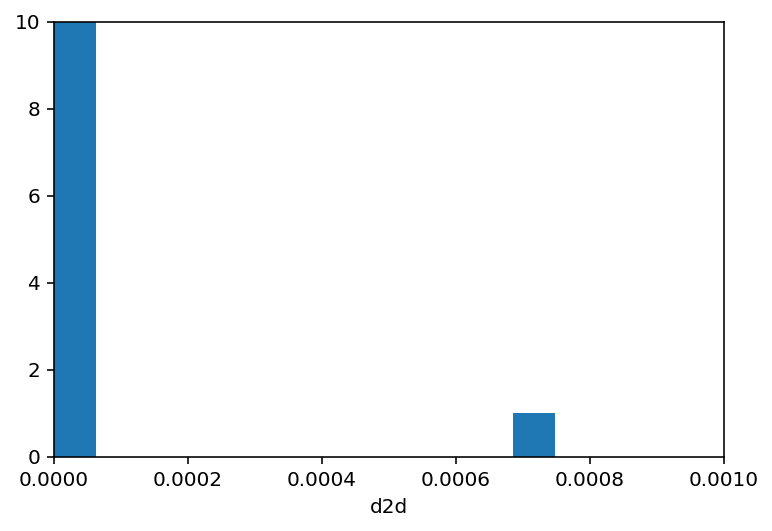

In [172]:
plt.hist(d2d, bins=1000)
plt.xlabel('d2d')
plt.xlim(0,0.001)
plt.ylim(0,10)

In [173]:
print len(np.unique(idxc_w))
print len(np.unique(idxc_r))
print len(idxc_w[d2d<0.0006*u.deg])
print len(idxc_r[d2d<0.0006*u.deg])

obje_wr = idxc_w[d2d<0.0006*u.deg]
obje_rw = idxc_r[d2d<0.0006*u.deg]

290
290
250
250


# Match do Wen com o Koester

In [174]:
print 'match to catalog 3d'
idwk, d2dw, d3d = c_w.match_to_catalog_3d(c_k) 
print 'Match Wen em relacao ao Redmapper =',len(idwk)
print idwk, d2dw, d3d 

print 'match to catalog 3d'
idkw, d2dk, d3d = c_k.match_to_catalog_3d(c_w) 
print 'Match Wen em relacao ao Redmapper =',len(idkw)
print idkw, d2dk, d3d

match to catalog 3d
Match Wen em relacao ao Redmapper = 132684
[7419 6667 7558 ..., 2448 7558 5206] [u'16d07m07.1878s' u'5d30m45.3252s' u'15d08m42.2407s' ..., u'1d51m03.441s'
 u'5d46m29.1791s' u'2d57m08.201s'] [ 148.67041547   90.07930269  968.68411243 ...,  120.69025126  518.87412629
  120.33543007] Mpc
match to catalog 3d
Match Wen em relacao ao Redmapper = 13823
[102825  40716  77649 ...,  29457  47116  73330] [u'2d06m09.0806s' u'0d00m00.1177s' u'0d22m16.9488s' ..., u'0d31m22.3697s'
 u'0d53m30.4223s' u'3d12m13.1059s'] [ 16.18249004   2.99766175   7.58859743 ...,  10.68611578  16.09161372
  31.08858291] Mpc


(0, 6)

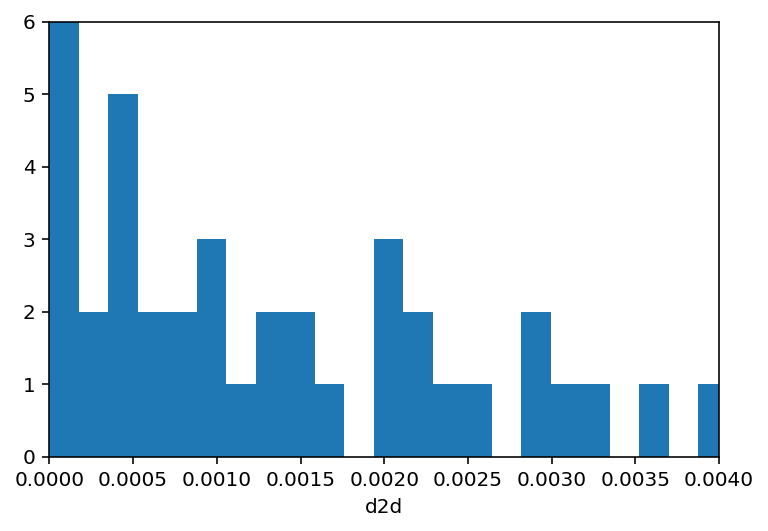

In [175]:
plt.hist(d2dk, bins=30000)
plt.xlabel('d2d')
plt.xlim(0,0.004)
plt.ylim(0,6)

In [176]:
print len(np.unique(idwk))
print len(np.unique(idkw))
print len(idwk[d2dw<0.0020*u.deg])
print len(idkw[d2dk<0.0020*u.deg])

11407
10106
2859
2220


In [177]:
print 'Objects around to catalog 3d'
idxc_w, idxc_k, d2d, d3d = c_k.search_around_3d(c_w, 1000*u.kpc)
print 'Números de objetos do wen =',len(idxc_w)
print 'Números de objetos do koester =',len(idxc_k)

Objects around to catalog 3d
Números de objetos do wen = 134
Números de objetos do koester = 134


(0, 10)

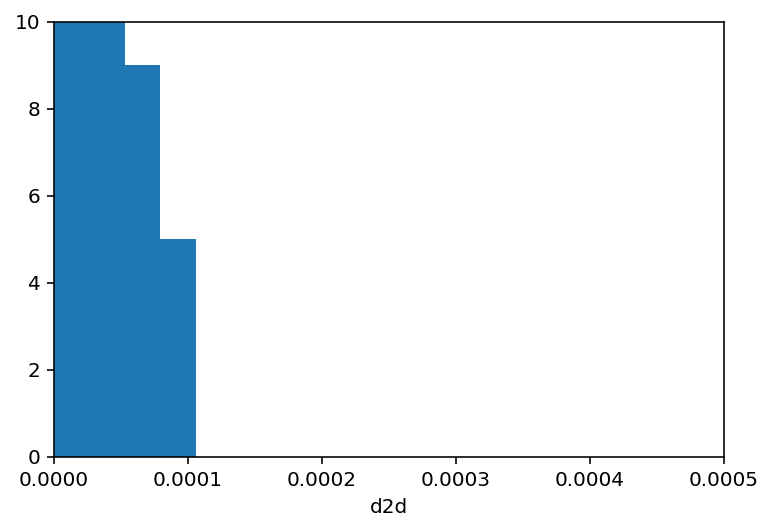

In [178]:
plt.hist(d2d, bins=3000)
plt.xlabel('d2d')
plt.xlim(0,0.0005)
plt.ylim(0,10)

In [179]:
print len(np.unique(idxc_w))
print len(np.unique(idxc_k))
print len(idxc_w[d2d<0.0002*u.deg])
print len(idxc_r[d2d<0.0002*u.deg])

obje_wk = idxc_w[d2d<0.0002*u.deg]
obje_kw = idxc_k[d2d<0.0002*u.deg]

134
134
120
120


/home/isabella/Downloads/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 290 but corresponding boolean dimension is 134


# Match do Koester com o Rykoff

In [180]:
print 'match to catalog 3d'
idkr, d2dk, d3d = c_k.match_to_catalog_3d(c_r) 
print 'Match Wen em relacao ao Redmapper =',len(idkr)
print idkr, d2dk, d3d 

print 'match to catalog 3d'
idrk, d2dr, d3d = c_r.match_to_catalog_3d(c_k) 
print 'Match Wen em relacao ao Redmapper =',len(idrk)
print idrk, d2dr, d3d 

match to catalog 3d
Match Wen em relacao ao Redmapper = 13823
[    0    18    12 ..., 11039  5641  3351] [u'0d00m00.0433s' u'0d06m05.5363s' u'0d00m00.2362s' ..., u'0d32m53.6089s'
 u'2d11m32.5287s' u'1d16m31.8612s'] [ 33.78239798   8.66886588   8.9358104  ...,  19.30755544  35.44308861
  17.92659839] Mpc
match to catalog 3d
Match Wen em relacao ao Redmapper = 26111
[    0  1209   173 ...,  9357 12208  9369] [u'0d00m00.0433s' u'0d00m00.186s' u'0d43m06.1583s' ..., u'2d36m05.4138s'
 u'2d55m54.3698s' u'0d16m24.9967s'] [  33.78239798    8.64209231   10.96266419 ...,  352.62514555  646.94940014
  662.10417112] Mpc


(0, 10)

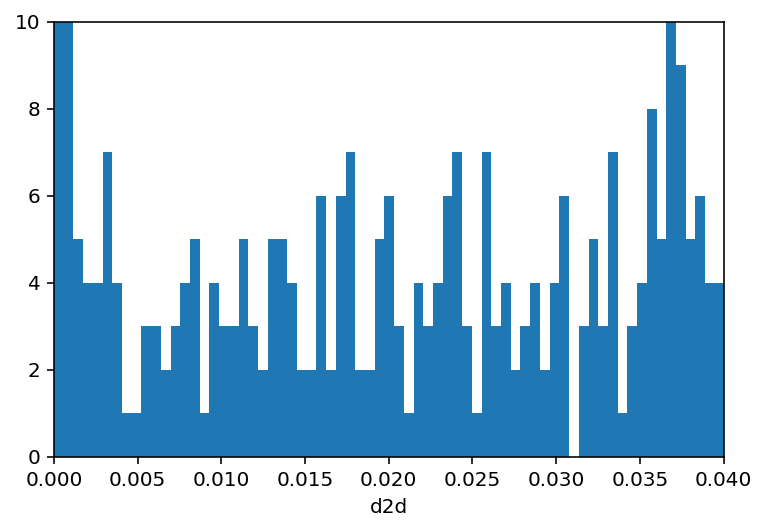

In [181]:
plt.hist(d2dk, bins=30000)
plt.xlabel('d2d')
plt.xlim(0,0.04)
plt.ylim(0,10)

In [182]:
print len(np.unique(idk))
print len(np.unique(idr))
print len(idrk[d2dr<0.035*u.deg])
print len(idkr[d2dk<0.035*u.deg])

4810
5031
1670
1927


In [183]:
print 'Objects around to catalog 3d'
idxc_r, idxc_k, d2d, d3d = c_k.search_around_3d(c_r, 1000*u.kpc) 
print 'Números de objetos do rykoff =',len(idxc_r)
print 'Números de objetos do koester =',len(idxc_k)

Objects around to catalog 3d
Números de objetos do rykoff = 66
Números de objetos do koester = 66


(0, 10)

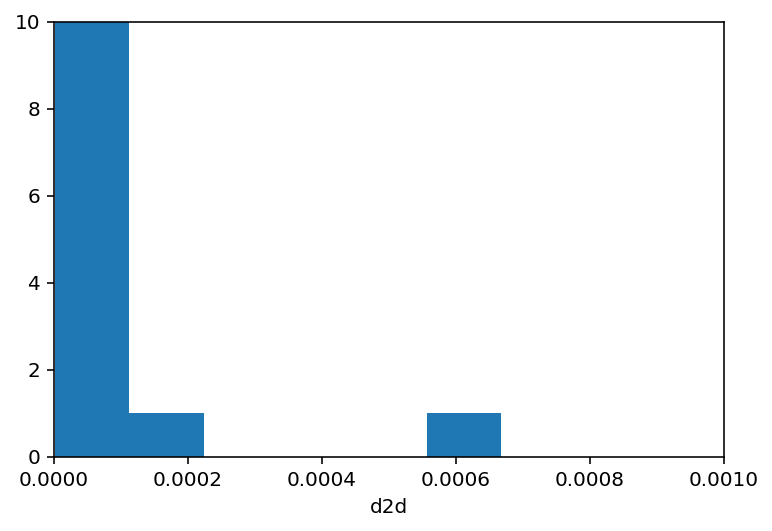

In [184]:
plt.hist(d2d, bins=1000)
plt.xlabel('d2d')
plt.xlim(0,0.001)
plt.ylim(0,10)

In [185]:
print len(np.unique(idxc_k))
print len(np.unique(idxc_r))
print len(idxc_k[d2d<0.0004*u.deg])
print len(idxc_r[d2d<0.0004*u.deg])

obje_kr = idxc_k[d2d<0.0004*u.deg]
obje_rk = idxc_r[d2d<0.0004*u.deg]

66
65
55
55


# Diagrama de Venn

In [214]:
lista_wk = (tuple(np.array(obje_wk)))
lista_wr = (tuple(np.array(obje_wr)))
lista_w = lista_wk + lista_wr

lista_rk = (tuple(np.array(obje_rk)))
lista_rw = (tuple(np.array(obje_rw)))
lista_r = lista_rk + lista_rw

lista_kw = (tuple(np.array(obje_kw)))
lista_kr = (tuple(np.array(obje_kr)))
lista_k = lista_kw + lista_kr

Diagrama de Venn


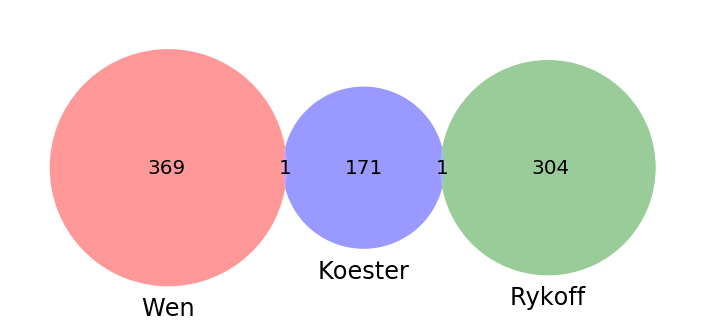

In [215]:
print("\033[43;30mDiagrama de Venn\033[m")
Wen = set(lista_w)
Rykoff = set(lista_r)
Koester = set(lista_k)
venn3([Wen, Rykoff, Koester], ('Wen', 'Rykoff', 'Koester'))
plt.show()